In [36]:
# Install required libraries (run this in a terminal or as a cell if needed)
# !pip install pandas numpy matplotlib seaborn nltk scikit-learn

# Import necessary libraries

# Import libraries
import pandas as pd
import numpy as np
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk

In [34]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('Wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Daniel.Temesgen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Error loading Wordnet: Package 'Wordnet' not found in
[nltk_data]     index


False

In [15]:
# Add the parent directory (benin_eda_project/) to the Python path
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(parent_dir)

In [20]:
import importlib
import src.data_loader
import src.data_analyzer
importlib.reload(src.data_analyzer)
importlib.reload(src.data_loader)
from src.data_loader import load_data
from src.data_analyzer import get_summary_statistics  #,convert_timestamp


# Debug: Print current working directory and Python path
print('Current working directory:', os.getcwd())
print('Python path:', sys.path)





Current working directory: c:\Users\Daniel.Temesgen\Desktop\KIAM\Week1\notebooks
Python path: ['C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313\\python313.zip', 'C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313\\DLLs', 'C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313\\Lib', 'C:\\Users\\Daniel.Temesgen\\AppData\\Local\\Programs\\Python\\Python313', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1', '', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages\\win32', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1\\venv_wk1\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1', 'c:\\Users\\Daniel.Temesgen\\Desktop\\KIAM\\Week1']


#Extract

In [23]:
# Load data
file_path = r'c:\Users\Daniel.Temesgen\Desktop\data\raw_analyst_ratings.csv'
df = load_data(file_path)
df.head()

2025-05-31 12:22:27,187 - INFO - Successfully loaded data from c:\Users\Daniel.Temesgen\Desktop\data\raw_analyst_ratings.csv with 1407328 rows


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [24]:
df['headline']

0                    Stocks That Hit 52-Week Highs On Friday
1                 Stocks That Hit 52-Week Highs On Wednesday
2                              71 Biggest Movers From Friday
3               46 Stocks Moving In Friday's Mid-Day Session
4          B of A Securities Maintains Neutral on Agilent...
                                 ...                        
1407323               Top Narrow Based Indexes For August 29
1407324    Recap: Wednesday's Top Percentage Gainers and ...
1407325    UPDATE: Oppenheimer Color on China Zenix Auto ...
1407326    Oppenheimer Initiates China Zenix At Outperfor...
1407327    China Zenix Auto International Opens For Tradi...
Name: headline, Length: 1407328, dtype: object

def descriptive_statistics(rating):
    """Perform descriptive statistics on news data."""
    # Headline length analysis
  

In [25]:
    df['headline_length'] = df['headline'].str.len()
    print("Headline Length Statistics:")
    print(df['headline_length'].describe())

Headline Length Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


 # Articles per publisher
   

In [26]:
#fix data type issue

df['date'] = pd.to_datetime(df['date'], format='ISO8601')

print("\nData Type Identification:")
print(df.dtypes)


Data Type Identification:
Unnamed: 0                             int64
headline                              object
url                                   object
publisher                             object
date               datetime64[ns, UTC-04:00]
stock                                 object
headline_length                        int64
dtype: object


In [27]:

    publisher_counts = df['publisher'].value_counts()
    print("\nArticles per Publisher:")
    print(publisher_counts.head(10))


Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


In [28]:
# 1. Headline Length Statistics
print("Headline Length Statistics:")
print(df['headline'].describe())

Headline Length Statistics:
count                     1407328
unique                     845770
top       Benzinga's Top Upgrades
freq                         5449
Name: headline, dtype: object


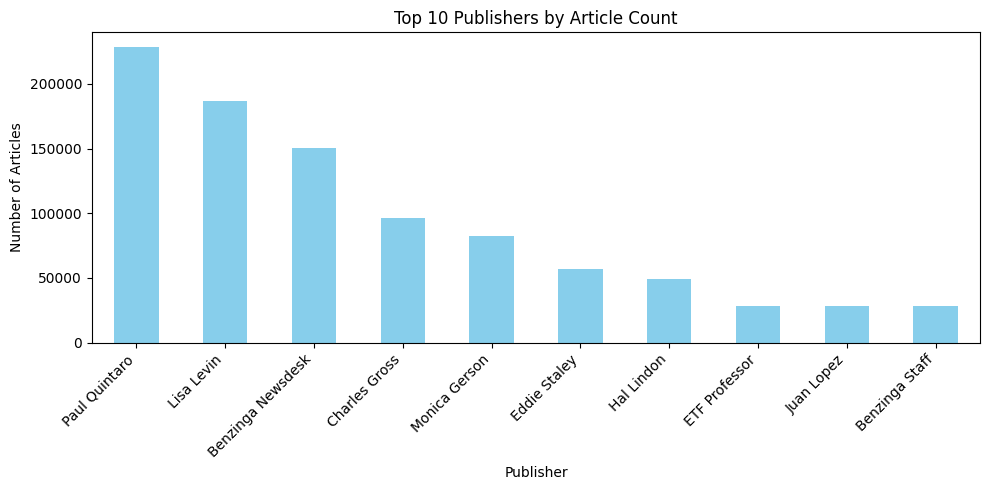

In [29]:
# Plot the top 10 publishers
plt.figure(figsize=(10, 5))
publisher_counts.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Publishers by Article Count')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

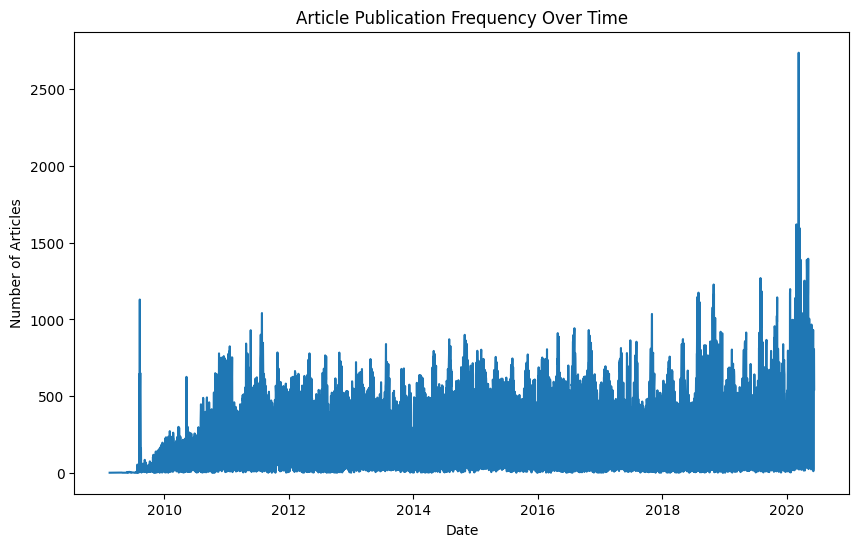

In [39]:
# Group by date
daily_counts = df.groupby(df['date'].dt.date).size()
# Plotting
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
daily_counts.plot()
plt.title('Article Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.savefig('publication_trend.png')
plt.show()

In [40]:
def publisher_analysis(df):
    """Analyze publisher domains."""
    df['domain'] = df['publisher'].str.extract(r'@([\w\.-]+)')
    domain_counts = df['domain'].value_counts()
    print("\nTop Publisher Domains:")
    print(domain_counts.head(10))
    plt.figure(figsize=(10, 6))
    sns.barplot(x=domain_counts.head(10).values, y=domain_counts.head(10).index)
    plt.title('Top 10 Publisher Domains')
    plt.xlabel('Number of Articles')
    plt.savefig('publisher_domains.png')
    plt.show()
    
   